In [64]:
import requests
import pandas as pd


In [65]:
# Lista de URLs de cada chunk
urls = [
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_1.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_2.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_3.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_4.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_5.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_6.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_7.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_8.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_9.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_10.html",
]

# Lista para almacenar cada DataFrame
dataframes = []

for url in urls:
    # Descargar el contenido de cada página
    response = requests.get(url)
    response.raise_for_status()  # Asegura que se descargó correctamente

    # Convertir el contenido HTML a un DataFrame
    tables = pd.read_html(response.text)
    
    # La tabla relevante suele ser la primera en estos archivos
    df = tables[0]  
    dataframes.append(df)

# Concatenar todos los DataFrames en uno solo
geih_raw = pd.concat(dataframes, ignore_index=True)

# Mostrar una muestra de los datos
print(geih_raw.head())

C:\Users\Sofia\AppData\Local\Temp\ipykernel_16296\172648185.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)
C:\Users\Sofia\AppData\Local\Temp\ipykernel_16296\172648185.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)
C:\Users\Sofia\AppData\Local\Temp\ipykernel_16296\172648185.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)
C:\Users\Sofia\AppData\Local\Temp\ipykernel_16296\172648185.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To

   Unnamed: 0  directorio  secuencia_p  orden  clase dominio  mes  estrato1  \
0           1     4514331            1      2      1  BOGOTA    1         2   
1           2     4514331            1      1      1  BOGOTA    1         2   
2           3     4514332            1      4      1  BOGOTA    1         2   
3           4     4514332            1      3      1  BOGOTA    1         2   
4           5     4514332            1      1      1  BOGOTA    1         2   

   sex  age  ...  y_viaticos_m  y_accidentes_m  y_salarySec_m  y_ingLab_m_ha  \
0    0   29  ...           NaN             NaN            NaN            NaN   
1    1   36  ...           NaN             NaN            NaN    8404.320312   
2    1    4  ...           NaN             NaN            NaN            NaN   
3    1    7  ...           NaN             NaN            NaN            NaN   
4    0   32  ...           NaN             NaN            NaN            NaN   

   y_gananciaNeta_m  y_gananciaNetaAgro_m  y

In [66]:
geih_raw #32177 rows × 178 columns

,Unnamed: 0,directorio,secuencia_p,orden,clase,dominio,mes,estrato1,sex,age,...,y_viaticos_m,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha
0,1,4514331,1,2,1,BOGOTA,1,2,0,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4514331,1,1,1,BOGOTA,1,2,1,36,...,NaN,NaN,NaN,8404.320312,NaN,NaN,NaN,NaN,1.620833e+06,8404.320312
2,3,4514332,1,4,1,BOGOTA,1,2,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4514332,1,3,1,BOGOTA,1,2,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,4514332,1,1,1,BOGOTA,1,2,0,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32172,3213,4804454,1,2,1,BOGOTA,12,2,0,24,...,NaN,NaN,NaN,3345.555664,NaN,NaN,NaN,NaN,1.003667e+06,3345.555664
32173,3214,4804455,1,1,1,BOGOTA,12,3,0,36,...,500000.0,NaN,NaN,25958.333984,NaN,NaN,NaN,NaN,6.675000e+06,25958.333984
32174,3215,4804455,1,2,1,BOGOTA,12,3,1,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32175,3216,4804455,1,3,1,BOGOTA,12,3,1,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# Exportar el df a un csv así lo podemos cargar directamente y no scrappear cada vez que queremos usarlo
geih_raw.to_csv(r"C:\Users\Sofia\OneDrive\Escritorio\ML\PS1\stores\geih_data.csv", index=False)

In [ ]:
# Eliminar la primera columna que corresponde al índice de la página web 
geih = geih_raw.drop("Unnamed: 0", axis=1)
geih.shape #(32177, 177)

(32177, 177)

In [69]:
# Filtrar las observaciones donde la columna 'age' es mayor a 17
geih = geih[geih['age'] > 17]

geih.shape #(24568, 177)

(24568, 177)

In [70]:
# ocu	=1 occupied; =0 otherwise
# Filtrar las observaciones donde la columna 'ocu' es igual a 1
geih = geih[geih['ocu'] == 1]

geih.shape #(16542, 177)

(16542, 177)

In [ ]:
# Filtrar las observaciones donde 'ingtot' es mayor a 0 y no tiene valores missing
geih = geih[(geih['y_total_m_ha'] > 0) & (geih['y_total_m_ha'].notna())]
geih.shape #(14764, 177)

(14764, 177)

In [72]:
geih.describe()

,directorio,secuencia_p,orden,clase,mes,estrato1,sex,age,p6050,p6090,...,y_viaticos_m,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha
count,1.476400e+04,14764.000000,14764.000000,14764.0,14764.000000,14764.000000,14764.000000,14764.000000,14764.000000,14764.000000,...,3.700000e+02,3.500000e+01,4.460000e+02,9892.000000,4.872000e+03,0.0,4.872000e+03,4872.000000,1.476400e+04,14764.000000
mean,4.657875e+06,1.014901,1.917096,1.0,6.497291,2.521336,0.526619,38.888174,2.201775,1.086359,...,3.236297e+06,4.471214e+05,6.954736e+05,8822.229341,1.357935e+06,NaN,1.357935e+06,8102.233746,1.617551e+06,8541.874328
std,8.169420e+04,0.136414,1.219258,0.0,3.362121,0.987021,0.499308,13.197838,1.799394,0.318851,...,1.058623e+07,7.379406e+05,1.135440e+06,12886.160570,2.466901e+06,NaN,2.466901e+06,15832.598917,2.431319e+06,13866.133412
min,4.514331e+06,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,18.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,6.000000e+03,326.666656,8.400000e+01,NaN,8.400000e+01,0.471528,8.400000e+01,0.471528
25%,4.588558e+06,1.000000,1.000000,1.0,4.000000,2.000000,0.000000,28.000000,1.000000,1.000000,...,1.325000e+05,0.000000e+00,1.200000e+05,4226.507812,5.000000e+05,NaN,5.000000e+05,2649.013733,8.000000e+05,3796.527832
50%,4.655331e+06,1.000000,2.000000,1.0,6.000000,2.000000,1.000000,37.000000,2.000000,1.000000,...,7.000000e+05,7.000000e+04,3.000000e+05,5055.555664,8.000000e+05,NaN,8.000000e+05,4148.147949,9.927447e+05,4837.486816
75%,4.728991e+06,1.000000,2.000000,1.0,9.000000,3.000000,1.000000,49.000000,3.000000,1.000000,...,2.000000e+06,5.950000e+05,7.000000e+05,8049.464600,1.500000e+06,NaN,1.500000e+06,7777.777832,1.554042e+06,7899.305664
max,4.804455e+06,4.000000,12.000000,1.0,12.000000,6.000000,1.000000,91.000000,9.000000,9.000000,...,1.300000e+08,3.125000e+06,1.000000e+07,350583.343750,7.000000e+07,NaN,7.000000e+07,340277.781250,7.000000e+07,350583.343750


In [ ]:
# Reemplazar valores faltantes o 'NA' en columnas de interés
geih = geih.dropna(subset=['y_total_m_ha', 'age', 'sex', 'clase', 'cotPension', 'totalHoursWorked', 'maxEducLevel', 'sizeFirm', 'p6426', 'relab'])

Estadística descriptiva

In [ ]:
# Conservar algunas variables para las estadadísticas descriptivas
geih_subset = geih[["y_total_m_ha", "age","clase", "sex", "cotPension", "hoursWorkUsual", "totalHoursWorked", "maxEducLevel", "microEmpresa", "sizeFirm", "p6426", "relab", "oficio", "fex_c"]]
geih_subset.describe()

,y_total_m_ha,age,clase,sex,cotPension,hoursWorkUsual,totalHoursWorked,maxEducLevel,microEmpresa,sizeFirm,p6426,relab,oficio,fex_c
count,14763.000000,14763.000000,14763.0,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000
mean,8542.184965,38.888370,1.0,0.526587,1.432026,47.197521,47.604823,5.947097,0.426472,3.213100,61.969857,2.140215,50.199079,249.705733
std,13866.551687,13.198263,0.0,0.499310,0.533179,15.056166,15.163460,1.208842,0.494581,1.652954,88.028382,1.455611,28.038649,60.240621
min,0.471528,18.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,106.612617
25%,3796.527832,28.000000,1.0,0.000000,1.000000,40.000000,40.000000,5.000000,0.000000,2.000000,7.000000,1.000000,33.000000,215.010351
50%,4837.831055,37.000000,1.0,1.000000,1.000000,48.000000,48.000000,6.000000,0.000000,4.000000,24.000000,1.000000,45.000000,240.747741
75%,7899.305664,49.000000,1.0,1.000000,2.000000,50.000000,50.000000,7.000000,1.000000,5.000000,72.000000,4.000000,73.500000,270.183529
max,350583.343750,91.000000,1.0,1.000000,3.000000,130.000000,130.000000,7.000000,1.000000,5.000000,720.000000,9.000000,99.000000,808.241452


In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
sns.set_theme(style="whitegrid", palette="pastel")

C:\Users\Sofia\AppData\Local\Temp\ipykernel_16296\1623883552.py:1: UserWarning: The `weights` parameter has no effect with kind='scatter'.
  g = sns.relplot(


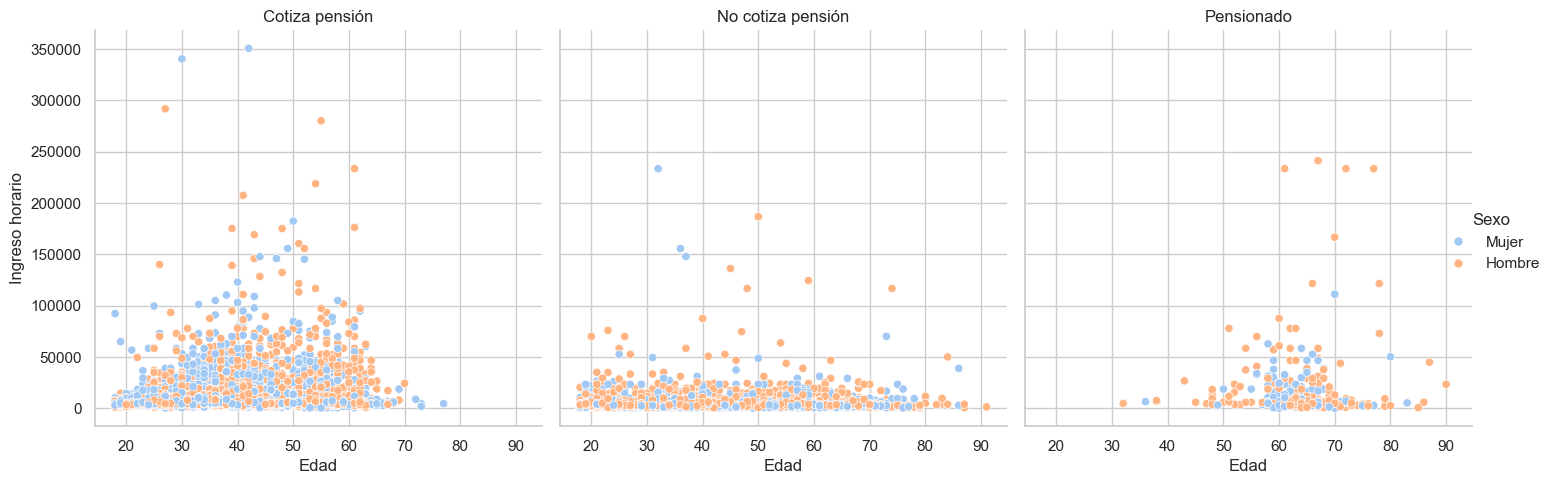

In [77]:
g = sns.relplot(
    data=geih_subset,
    x="age", y="y_total_m_ha",
    hue="sex", col="cotPension",
    weights = "fex_c",
    legend="full"
)

# Cambio las etiquetas de la leyenda para 'sex'
new_labels = ["Mujer", "Hombre"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g._legend.set_title("Sexo")

# Cambio el título del eje x a "Edad"
g.set_axis_labels("Edad", "Ingreso horario")

# Cambio los títulos de cada subgráfico basado en el valor de 'cotPension'
titulo_map = {1: "Cotiza pensión",
              2: "No cotiza pensión",
              3: "Pensionado"}
for ax, col_val in zip(g.axes.flat, geih_subset['cotPension'].unique()):
    ax.set_title(titulo_map[col_val])

plt.show()

In [78]:
import numpy as np

In [ ]:
# Crear una variable que indica formal o informal de acuerdo a si cotiza o no pensión. Al sacar su media voy a saber qué porcentaje de la población es formal e informal
geih_subset["pension"] = geih_subset["cotPension"].apply(lambda x: 1 if x == 1 else (0 if x == 2 else np.nan))

C:\Users\Sofia\AppData\Local\Temp\ipykernel_16296\4089032063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geih_subset["pension"] = geih_subset["cotPension"].apply(lambda x: 1 if x == 1 else (0 if x == 2 else np.nan))


In [80]:
# ESTADÍSTICAS DESCRIPTIVAS

est_desc = geih_subset.describe().applymap(lambda x: round(x, 2))
est_desc

C:\Users\Sofia\AppData\Local\Temp\ipykernel_16296\1605065180.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  est_desc = geih_subset.describe().applymap(lambda x: round(x, 2))


,y_total_m_ha,age,clase,sex,cotPension,hoursWorkUsual,totalHoursWorked,maxEducLevel,microEmpresa,sizeFirm,p6426,relab,oficio,fex_c,pension
count,14763.00,14763.00,14763.0,14763.00,14763.00,14763.00,14763.00,14763.00,14763.00,14763.00,14763.00,14763.00,14763.00,14763.00,14476.00
mean,8542.18,38.89,1.0,0.53,1.43,47.20,47.60,5.95,0.43,3.21,61.97,2.14,50.20,249.71,0.60
std,13866.55,13.20,0.0,0.50,0.53,15.06,15.16,1.21,0.49,1.65,88.03,1.46,28.04,60.24,0.49
min,0.47,18.00,1.0,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,1.00,106.61,0.00
25%,3796.53,28.00,1.0,0.00,1.00,40.00,40.00,5.00,0.00,2.00,7.00,1.00,33.00,215.01,0.00
50%,4837.83,37.00,1.0,1.00,1.00,48.00,48.00,6.00,0.00,4.00,24.00,1.00,45.00,240.75,1.00
75%,7899.31,49.00,1.0,1.00,2.00,50.00,50.00,7.00,1.00,5.00,72.00,4.00,73.50,270.18,1.00
max,350583.34,91.00,1.0,1.00,3.00,130.00,130.00,7.00,1.00,5.00,720.00,9.00,99.00,808.24,1.00


In [81]:
import math

In [ ]:
# Transformar a logaritmo para graficar la densidad
geih_subset["log_y_total_m_ha"] = geih_subset["y_total_m_ha"].apply(lambda x: math.log(x))

C:\Users\Sofia\AppData\Local\Temp\ipykernel_16296\3690985029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geih_subset["log_y_total_m_ha"] = geih_subset["y_total_m_ha"].apply(lambda x: math.log(x))


C:\Users\Sofia\AppData\Local\Temp\ipykernel_16296\3578594872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geih_subset["condicion"] = geih_subset["cotPension"].apply(


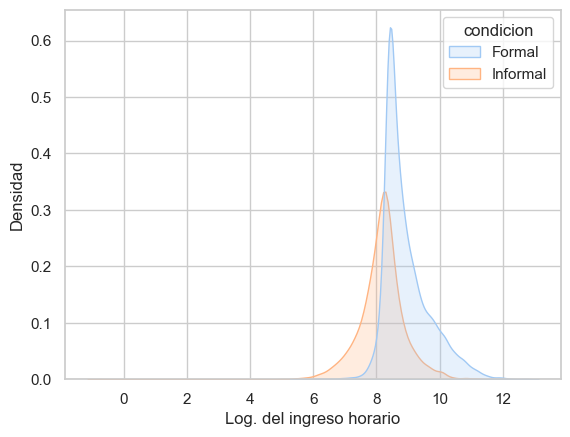

In [ ]:
# Cambiar pensión a formato categórico para poder graficar con las leyendas correctas
geih_subset["condicion"] = geih_subset["cotPension"].apply(
    lambda x: "Formal" if x == 1 else ("Informal" if x == 2 else np.nan)
)

# DENSIDAD INGRESO X CONDICION
g = sns.kdeplot(
    data=geih_subset,
    x="log_y_total_m_ha",
    hue="condicion",
    weights = "fex_c",
    fill=True,
    legend="full", common_norm=True
)

g.set_xlabel("Log. del ingreso horario") # Setteo label eje x
g.set_ylabel("Densidad") # Setteo label eje y
plt.show()


C:\Users\Sofia\AppData\Local\Temp\ipykernel_16296\2343507918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geih_subset["sexo"] = geih_subset["sex"].apply(


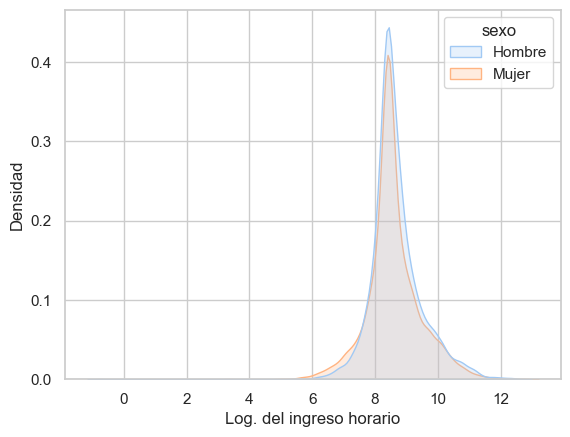

In [ ]:
# Cambiar sexo a formato categórico para poder graficar con las leyendas correctas
geih_subset["sexo"] = geih_subset["sex"].apply(
    lambda x: "Hombre" if x == 1 else ("Mujer" if x == 0 else np.nan)
)

# DENSIDAD INGRESO POR SEXO
g = sns.kdeplot(
    data=geih_subset,
    x="log_y_total_m_ha",
    hue="sexo",
    weights = "fex_c",
    fill=True,
    legend="full", common_norm=True
)

g.set_xlabel("Log. del ingreso horario") # Setteo label eje x
g.set_ylabel("Densidad") # Setteo label eje y
plt.show()


In [ ]:
# SACAR EL % DE FORMALES/INFORMALES EXCLUYENDO A LOS CUENTAPROPISTAS Y EMPLEADORES

# Filtrar el DataFrame
filtered_df = geih_subset[geih_subset['relab'].isin([1, 2, 3, 6, 7, 8])]

# Calcular el promedio de 'antig' en el subconjunto filtrado
promedio_antig = filtered_df['pension'].mean()

print(f"El valor promedio de 'formal' para los individuos con 'relab' igual a 1, 2, 3, 6, 7, 8 es: {promedio_antig}")
#relab 1 "Obrero o empleado de empresa particular"
#relab 2 "Obrero o empleado del gobierno"
#relab 3 "Empleado doméstico"
#relab 6 "Trabajador familiar sin remuneracion";
#relab 7 "Trabajador sin remuneracin en empresas o negocios de otros hogares";
#relab 8 "Jornalero o peon";

El valor promedio de 'formal' para los individuos con 'relab' igual a 1, 2, 3, 6, 7, 8 es: 0.767988552739166


In [86]:
from matplotlib.ticker import FixedLocator, FixedFormatter

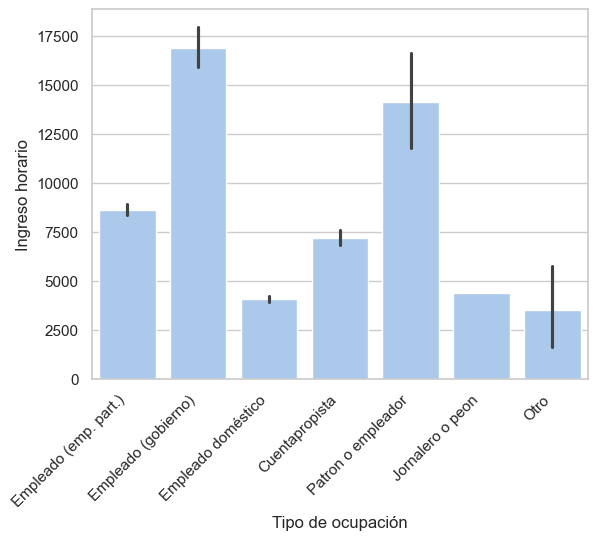

In [ ]:
# Crear el barplot
ax = sns.barplot(data=geih_subset, x="relab", y="y_total_m_ha", weights="fex_c", errorbar=("ci", 95))

# Settear axis labels
ax.set_xlabel("Tipo de ocupación")
ax.set_ylabel("Ingreso horario")

# Definir diccionario con las labels de relab
relab_labels = {
    1.0: "Empleado (emp. part.)", 
    2.0: "Empleado (gobierno)",
    3.0: "Empleado doméstico",
    4.0: "Cuentapropista",
    5.0: "Patron o empleador",
    6.0: "Trabajador familiar sin remuneracion",
    7.0: "Trabajador sin remuneracin en emp.",
    8.0: "Jornalero o peon",
    9.0: "Otro"
}

tick_positions = ax.get_xticks()

# Obtener las labels en números
current_labels = [float(label.get_text()) for label in ax.get_xticklabels()]

# Reemplazar por el diccionario creado
new_labels = [relab_labels.get(label, label) for label in current_labels]

ax.xaxis.set_major_locator(FixedLocator(tick_positions))
ax.xaxis.set_major_formatter(FixedFormatter(new_labels))

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

Predicting wages

In [88]:
# Variables predictoras (X)
X = geih[['age', 'sex', 'clase', 'cotPension', 'totalHoursWorked', 'maxEducLevel', 'sizeFirm', 'p6426', 'relab']]

# Variable objetivo (y)
y = geih['y_total_m_ha']

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import numpy as np

# Divido los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Estandarización de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Especificaciones del modelo
especificaciones = {
    'Modelo Simple': LinearRegression(),
    'Modelo con Interacciones (Grado 2)': PolynomialFeatures(degree=2, interaction_only=True),
    'Modelo Polinómico (Grado 2)': PolynomialFeatures(degree=2),
    'Modelo Polinómico (Grado 3)': PolynomialFeatures(degree=3),
    'Modelo Polinómico (Grado 4)': PolynomialFeatures(degree=4),
    'Modelo con Selección de Variables (age, sex)': ['age', 'sex'],
    'Modelo con Selección de Variables (clase, p6426, sizeFirm)': ['clase', 'p6426', 'sizeFirm'],
    'Modelo con Selección de Variables (cotPension, totalHoursWorked)': ['cotPension', 'totalHoursWorked'],
    'Modelo con Sexo, Edad y Edad al Cuadrado': ['sex', 'age', 'age_squared'], 
    'Regresión Ridge': RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5),  # Mediante validación cruzada obtengo el mejor alpha
    'Regresión Lasso': LassoCV(alphas=np.logspace(-3, 3, 50), cv=5, max_iter=10000),
    'Modelo con Sexo, Edad y Edad al Cuadrado': ['sex', 'age', 'age_squared'],  
    'Modelo Completo': X.columns.tolist() + ['age_squared']  
}

# Diccionario para almacenar los resultados
resultados = {}

# Entreno y evalúo cada especificación
for nombre, especificacion in especificaciones.items():
    if isinstance(especificacion, PolynomialFeatures):  # Modelos con transformaciones polinómicas
        poly = especificacion
        X_train_poly = poly.fit_transform(X_train_scaled)
        X_test_poly = poly.transform(X_test_scaled)
        modelo = LinearRegression()
        modelo.fit(X_train_poly, y_train)
        predicciones = modelo.predict(X_test_poly)
    elif isinstance(especificacion, list):  # Modelos con selección de variables
        if 'age_squared' in especificacion:
            # Agrego la columna derivada `age_squared` temporalmente
            X_train_sel = np.copy(X_train_scaled)
            X_test_sel = np.copy(X_test_scaled)
            age_index = X.columns.get_loc('age')
            X_train_sel = np.column_stack((X_train_sel, X_train_sel[:, age_index] ** 2))
            X_test_sel = np.column_stack((X_test_sel, X_test_sel[:, age_index] ** 2))
            selected_indices = [X.columns.get_loc(col) if col != 'age_squared' else X_train_sel.shape[1] - 1
                                for col in especificacion]
            X_train_sel = X_train_sel[:, selected_indices]
            X_test_sel = X_test_sel[:, selected_indices]
        else:
            selected_indices = [X.columns.get_loc(col) for col in especificacion]
            X_train_sel = X_train_scaled[:, selected_indices]
            X_test_sel = X_test_scaled[:, selected_indices]
        modelo = LinearRegression()
        modelo.fit(X_train_sel, y_train)
        predicciones = modelo.predict(X_test_sel)
    elif isinstance(especificacion, (RidgeCV, LassoCV)):  # Validación cruzada para Ridge y Lasso
        modelo = especificacion
        modelo.fit(X_train_scaled, y_train)
        predicciones = modelo.predict(X_test_scaled)
        print(f"{nombre}: Mejor alpha seleccionado = {modelo.alpha_}")  # Imprimir el alpha que se usará en Ridge y en Lasso
    else:  # Modelos estándar (simple y completo)
        if nombre == 'Modelo Completo':
            # Agrego `age_squared` al modelo completo
            X_train_comp = np.copy(X_train_scaled)
            X_test_comp = np.copy(X_test_scaled)
            age_index = X.columns.get_loc('age')
            X_train_comp = np.column_stack((X_train_comp, X_train_comp[:, age_index] ** 2))
            X_test_comp = np.column_stack((X_test_comp, X_test_comp[:, age_index] ** 2))
            modelo = especificacion
            modelo.fit(X_train_comp, y_train)
            predicciones = modelo.predict(X_test_comp)
        else:
            modelo = especificacion
            modelo.fit(X_train_scaled, y_train)
            predicciones = modelo.predict(X_test_scaled)

    # Calculo el RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predicciones))
    resultados[nombre] = rmse

# Muestro los resultados
for nombre, rmse in resultados.items():
    print(f'{nombre}: RMSE = {rmse}')


Regresión Ridge: Mejor alpha seleccionado = 184.20699693267164
Regresión Lasso: Mejor alpha seleccionado = 0.001
Modelo Simple: RMSE = 11570.847665745174
Modelo con Interacciones (Grado 2): RMSE = 11360.838819865003
Modelo Polinómico (Grado 2): RMSE = 11151.497398100766
Modelo Polinómico (Grado 3): RMSE = 11090.694955521472
Modelo Polinómico (Grado 4): RMSE = 11485.038003080008
Modelo con Selección de Variables (age, sex): RMSE = 12522.82026638634
Modelo con Selección de Variables (clase, p6426, sizeFirm): RMSE = 12225.751980301715
Modelo con Selección de Variables (cotPension, totalHoursWorked): RMSE = 12219.614619295266
Modelo con Sexo, Edad y Edad al Cuadrado: RMSE = 12493.940635335348
Regresión Ridge: RMSE = 11565.652365938833
Regresión Lasso: RMSE = 11570.847546158646
Modelo Completo: RMSE = 11554.725295602868


In [90]:

# Genero características polinómicas
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Entreno el modelo
modelo_polinomico = LinearRegression()
modelo_polinomico.fit(X_train_poly, y_train)

# Predicciones
predicciones_polinomico = modelo_polinomico.predict(X_test_poly)


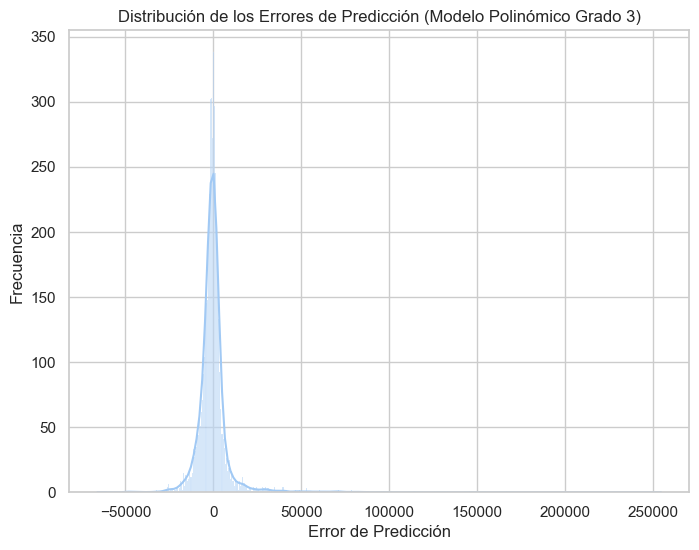

Errores extremos encontrados (Modelo Polinómico Grado 3): 132
Resumen de los errores extremos:
count       132.000000
mean      29379.268372
std       48216.097029
min      -65905.527771
25%      -22487.111084
50%       30161.261719
75%       49975.388672
max      254520.156250
Name: y_total_m_ha, dtype: float64
25500     34873.167969
19725     95389.585938
15469     36733.417969
5067     -25291.861328
2501     133228.781250
             ...      
18891    125838.609375
5175      29477.523438
11628     24193.324219
12806     41206.582031
4723      82061.617188
Name: y_total_m_ha, Length: 132, dtype: float64


In [ ]:
# Cálculo de los errores de predicción
errores_prediccion = y_test - predicciones_polinomico

# Histograma de los errores
plt.figure(figsize=(8, 6))
sns.histplot(errores_prediccion, kde=True)
plt.title('Distribución de los Errores de Predicción (Modelo Polinómico Grado 3)')
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.show()

# Verifico los errores más grandes y más pequeños
errores_extremos = errores_prediccion[np.abs(errores_prediccion) > 2 * np.std(errores_prediccion)]
print(f"Errores extremos encontrados (Modelo Polinómico Grado 3): {len(errores_extremos)}")
print("Resumen de los errores extremos:")
print(pd.Series(errores_extremos).describe())
print(errores_extremos)


In [92]:
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import make_pipeline
from joblib import Parallel, delayed


# Tomo un subconjunto de 3000 observaciones aleatorias (para agilizar el código)
X_train_subset = X_train.sample(n=3000, random_state=123)
y_train_subset = y_train[X_train_subset.index]

# Defino los modelos con menor error de predicción
modelos_loocv = {
    'Modelo Polinómico (Grado 3)': make_pipeline(StandardScaler(), PolynomialFeatures(degree=3), LinearRegression()),
    'Modelo Polinómico (Grado 2)': make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())
}

# Diccionario para almacenar los errores de LOOCV
errores_loocv = {}

# Función para calcular el RMSE de cada iteración LOOCV
def calcular_rmse_loo(modelo, X_train_loo, y_train_loo, X_test_loo, y_test_loo):
    modelo.fit(X_train_loo, y_train_loo)  
    prediccion_loo = modelo.predict(X_test_loo)  
    return np.sqrt(mean_squared_error(y_test_loo, prediccion_loo)) 

# Bucle para realizar LOOCV para cada modelo
for nombre, modelo in modelos_loocv.items():
    loo = LeaveOneOut()
    
    # Paralelización del cálculo de LOOCV
    resultados = Parallel(n_jobs=-1)(
        delayed(calcular_rmse_loo)(
            modelo, 
            X_train_subset.iloc[train_index].values,  
            y_train_subset.iloc[train_index].values, 
            X_train_subset.iloc[test_index].values.reshape(1, -1), 
            y_train_subset.iloc[test_index].values
        )
        for train_index, test_index in loo.split(X_train_subset)
    )

    # Almaceno el RMSE promedio de LOOCV
    errores_loocv[nombre] = np.mean(resultados)

# Muestro los resultados de LOOCV
for nombre, rmse_loocv in errores_loocv.items():
    print(f'{nombre} - LOOCV RMSE: {rmse_loocv}')



Modelo Polinómico (Grado 3) - LOOCV RMSE: 5453.485578758876
Modelo Polinómico (Grado 2) - LOOCV RMSE: 5288.162358271917


Crear txt con librerías requeridas

In [94]:
# Código adaptable para crear un txt con las librerías a importar y agregar al README
# De esta manera si el script cambia, las personas pueden ver las librerías requeridas de manera actualizada
import nbformat
from collections import Counter

notebook_path = "PS_1_ML.ipynb"

with open(notebook_path, "r", encoding="utf-8") as f:
    notebook = nbformat.read(f, as_version=4)

# Busco las partes del código en las que se importa una librería
imports = []
for cell in notebook['cells']:
    if cell['cell_type'] == 'code':
        for line in cell['source'].split("\n"):
            if line.startswith("import ") or " from " in line:
                imports.append(line.split()[1].split(".")[0])

# Genero un contador  
dependencies = Counter(imports)

# Creo requirements.txt
with open("requirements.txt", "w") as f:
    for dep in dependencies:
        f.write(dep + "\n")